In [1]:
import sys
from pathlib import Path

# Añade el directorio raíz del proyecto al sys.path
project_root = Path('../').resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from src.processing.PreprocessingEducationalData import PreprocessingEducationalData
from src.models.StudentPerformanceAnalyzer import StudentPerformanceAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
filename_processed = '../data/processed/StudentPerformanceFactors.csv'
df = pd.read_csv(filename_processed)
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Entrenando modelo: linear
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Entrenando modelo: ridge
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Entrenando modelo: lasso
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Entrenando modelo: elasticnet
Fitting 5 folds for each of 90 candidates, totalling 450 fits
ANÁLISIS COMPLETO DEL MODELO DE RENDIMIENTO ESTUDIANTIL

1. INFORMACIÓN DEL MODELO
----------------------------------------
Tipo de modelo seleccionado: elasticnet

Mejores hiperparámetros:
- alpha: 0.001
- fit_intercept: True
- l1_ratio: 0.7

2. MÉTRICAS DE RENDIMIENTO
----------------------------------------

Métricas en conjunto de prueba:
- r2: 0.7452
- rmse: 0.4878
- mae: 0.1727
- adjusted_r2: 0.7421

Resultados de Validación Cruzada:
- r2:
  * Media: 0.6949
  * Desviación estándar: 0.0333
- rmse:
  * Media: 0.5564
  * Desviación estándar: 0.0454
- mae:
  * Media: 0.1926
  * Desviación estándar: 0.0079

3. ANÁLISIS DE CARACTERÍSTIC

,feature,importance,type
0,Attendance,0.594129,Numérica
1,Hours_Studied,0.448670,Numérica
2,Access_to_Resources,0.264727,Ordinal
3,Parental_Involvement,0.256244,Ordinal
4,Internet_Access_Yes,0.231624,Nominal
5,Learning_Disabilities_Yes,0.216296,Nominal
6,Previous_Scores,0.181596,Numérica
7,Tutoring_Sessions,0.161588,Numérica
8,Extracurricular_Activities_Yes,0.148152,Nominal
9,Family_Income,0.137778,Ordinal



Importancia por tipo de característica:

Nominal:


,feature,importance,type
0,Internet_Access_Yes,0.231624,Nominal
1,Learning_Disabilities_Yes,0.216296,Nominal
2,Extracurricular_Activities_Yes,0.148152,Nominal
3,Gender_Male,0.000973,Nominal
4,School_Type_Public,0.000000,Nominal



Numérica:


,feature,importance,type
0,Attendance,0.594129,Numérica
1,Hours_Studied,0.448670,Numérica
2,Previous_Scores,0.181596,Numérica
3,Tutoring_Sessions,0.161588,Numérica
4,Physical_Activity,0.046470,Numérica
5,Sleep_Hours,0.004052,Numérica



Ordinal:


,feature,importance,type
0,Access_to_Resources,0.264727,Ordinal
1,Parental_Involvement,0.256244,Ordinal
2,Family_Income,0.137778,Ordinal
3,Peer_Influence,0.131124,Ordinal
4,Motivation_Level,0.130775,Ordinal



4. VISUALIZACIONES
----------------------------------------


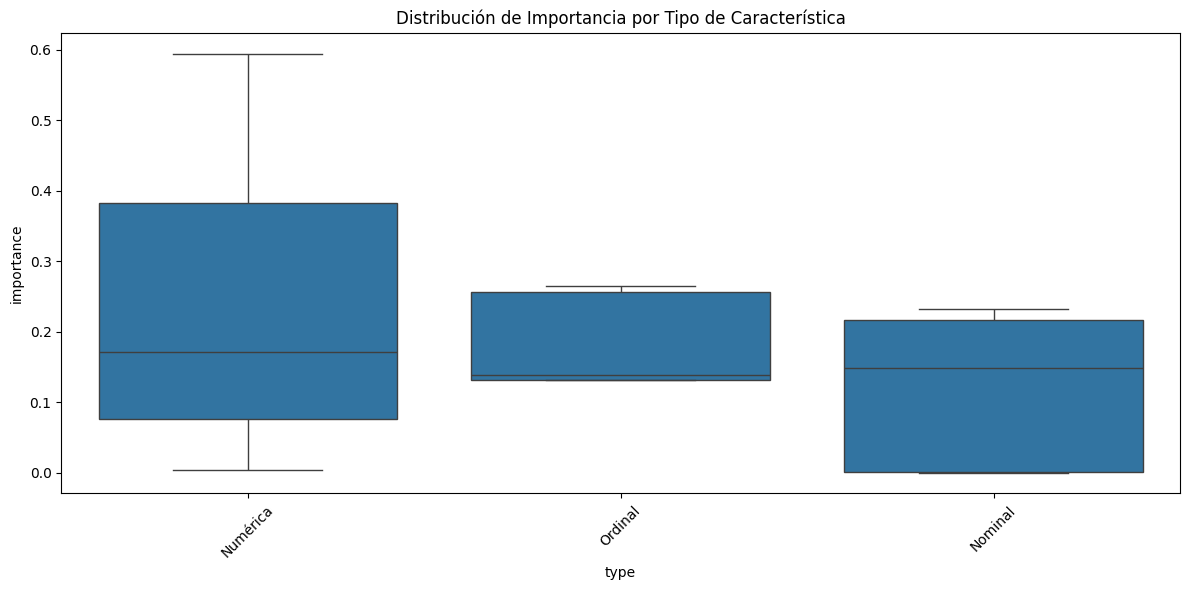

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x800 with 0 Axes>

In [4]:
preprocessor = PreprocessingEducationalData()
analyzer = StudentPerformanceAnalyzer(preprocessor)
results = analyzer.analyze_performance(df)

"""
Realiza un análisis completo de los resultados del modelo

Parameters:
-----------
analyzer : StudentPerformanceAnalyzer
    Instancia del analizador de rendimiento estudiantil
results : dict
    Resultados del análisis retornados por analyze_performance()
"""

print("="*80)
print("ANÁLISIS COMPLETO DEL MODELO DE RENDIMIENTO ESTUDIANTIL")
print("="*80)

# 1. Información del Modelo
print("\n1. INFORMACIÓN DEL MODELO")
print("-"*40)
print(f"Tipo de modelo seleccionado: {results['model_info']['type']}")
print("\nMejores hiperparámetros:")
for param, value in results['model_info']['best_params'].items():
    print(f"- {param}: {value}")

# 2. Métricas de Rendimiento
print("\n2. MÉTRICAS DE RENDIMIENTO")
print("-"*40)
print("\nMétricas en conjunto de prueba:")
for metric, value in results['model_performance']['test_metrics'].items():
    print(f"- {metric}: {value:.4f}")

print("\nResultados de Validación Cruzada:")
for metric, stats in results['model_performance']['cross_validation'].items():
    print(f"- {metric}:")
    print(f"  * Media: {stats['mean']:.4f}")
    print(f"  * Desviación estándar: {stats['std']:.4f}")

# 3. Análisis de Características
print("\n3. ANÁLISIS DE CARACTERÍSTICAS")
print("-"*40)

print("\nTop 10 características más importantes:")
top_features_df = pd.DataFrame(results['feature_importance']['overall'])
display(top_features_df)

print("\nImportancia por tipo de característica:")
for tipo, features in results['feature_importance']['by_type'].items():
    print(f"\n{tipo}:")
    display(pd.DataFrame(features))

# 4. Visualizaciones
print("\n4. VISUALIZACIONES")
print("-"*40)

# 4.1 Distribución de importancia por tipo
plt.figure(figsize=(12, 6))
importance_by_type = pd.DataFrame(results['feature_importance']['overall'])
sns.boxplot(data=importance_by_type, x='type', y='importance')
plt.title('Distribución de Importancia por Tipo de Característica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.2 Correlación entre características importantes
if hasattr(analyzer, 'best_model') and hasattr(analyzer.best_model, 'coef_'):
    plt.figure(figsize=(10, 8))
    top_10_features = top_features_df['feature'].tolist()
    correlation_matrix = analyzer.best_model.coef_[
        np.ix_(range(len(top_10_features)), range(len(top_10_features)))
    ]
    
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        xticklabels=top_10_features,
        yticklabels=top_10_features
    )
    plt.title('Correlación entre Top 10 Características')
    plt.tight_layout()
    plt.show()

# 5. Diagnósticos adicionales
print("\n5. DIAGNÓSTICOS ADICIONALES")
print("-"*40)

if hasattr(analyzer, 'residuals'):
    print("\nEstadísticas de residuos:")
    residuals_stats = {
        'Media': np.mean(analyzer.residuals),
        'Desviación estándar': np.std(analyzer.residuals),
        'Mediana': np.median(analyzer.residuals),
        'Q1': np.percentile(analyzer.residuals, 25),
        'Q3': np.percentile(analyzer.residuals, 75),
        'Mínimo': np.min(analyzer.residuals),
        'Máximo': np.max(analyzer.residuals)
    }
    
    for stat, value in residuals_stats.items():
        print(f"- {stat}: {value:.4f}")

# 6. Resumen de Recomendaciones
print("\n6. RECOMENDACIONES")
print("-"*40)

# Análisis del R²
r2_score = results['model_performance']['test_metrics']['r2']
if r2_score > 0.8:
    print("- El modelo muestra un muy buen ajuste a los datos")
elif r2_score > 0.6:
    print("- El modelo muestra un ajuste moderado, podría mejorarse")
else:
    print("- El modelo muestra un ajuste débil, se recomienda revisión")

# Análisis de la variabilidad en CV
cv_r2_std = results['model_performance']['cross_validation']['r2']['std']
if cv_r2_std > 0.1:
    print("- Alta variabilidad en CV, considerar más datos o regularización")
else:
    print("- Buena estabilidad en validación cruzada")

# Recomendaciones basadas en tipos de características
importance_by_type = pd.DataFrame(results['feature_importance']['overall'])
for tipo in importance_by_type['type'].unique():
    mean_importance = importance_by_type[
        importance_by_type['type'] == tipo
    ]['importance'].mean()
    if mean_importance < 0.1:
        print(f"- Considerar revisar la relevancia de variables {tipo}")

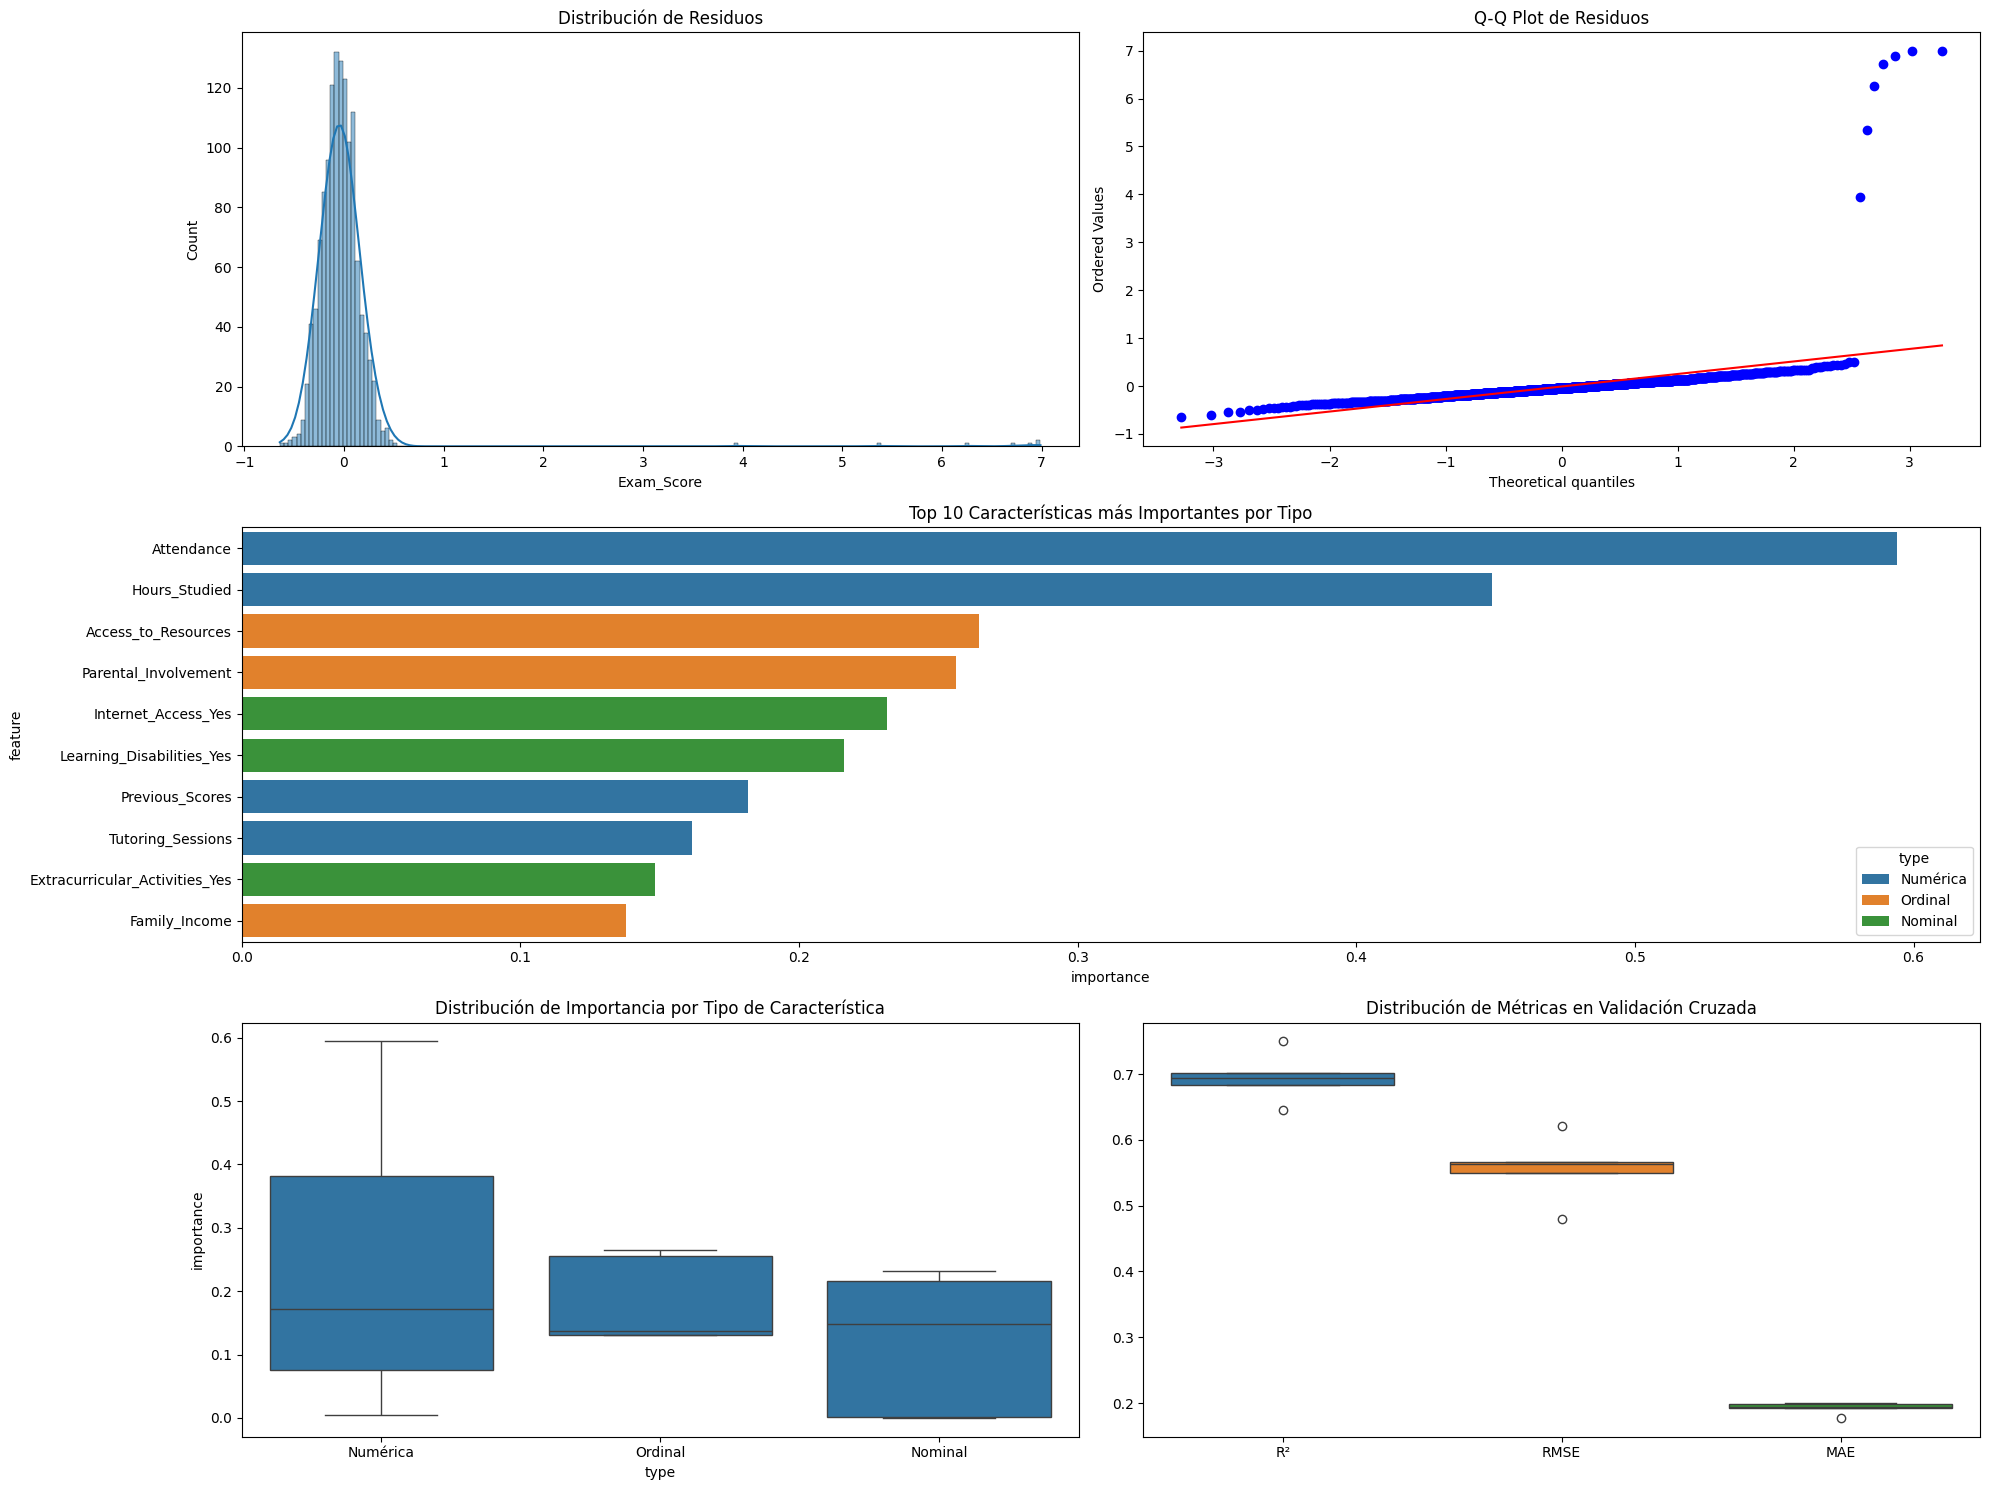

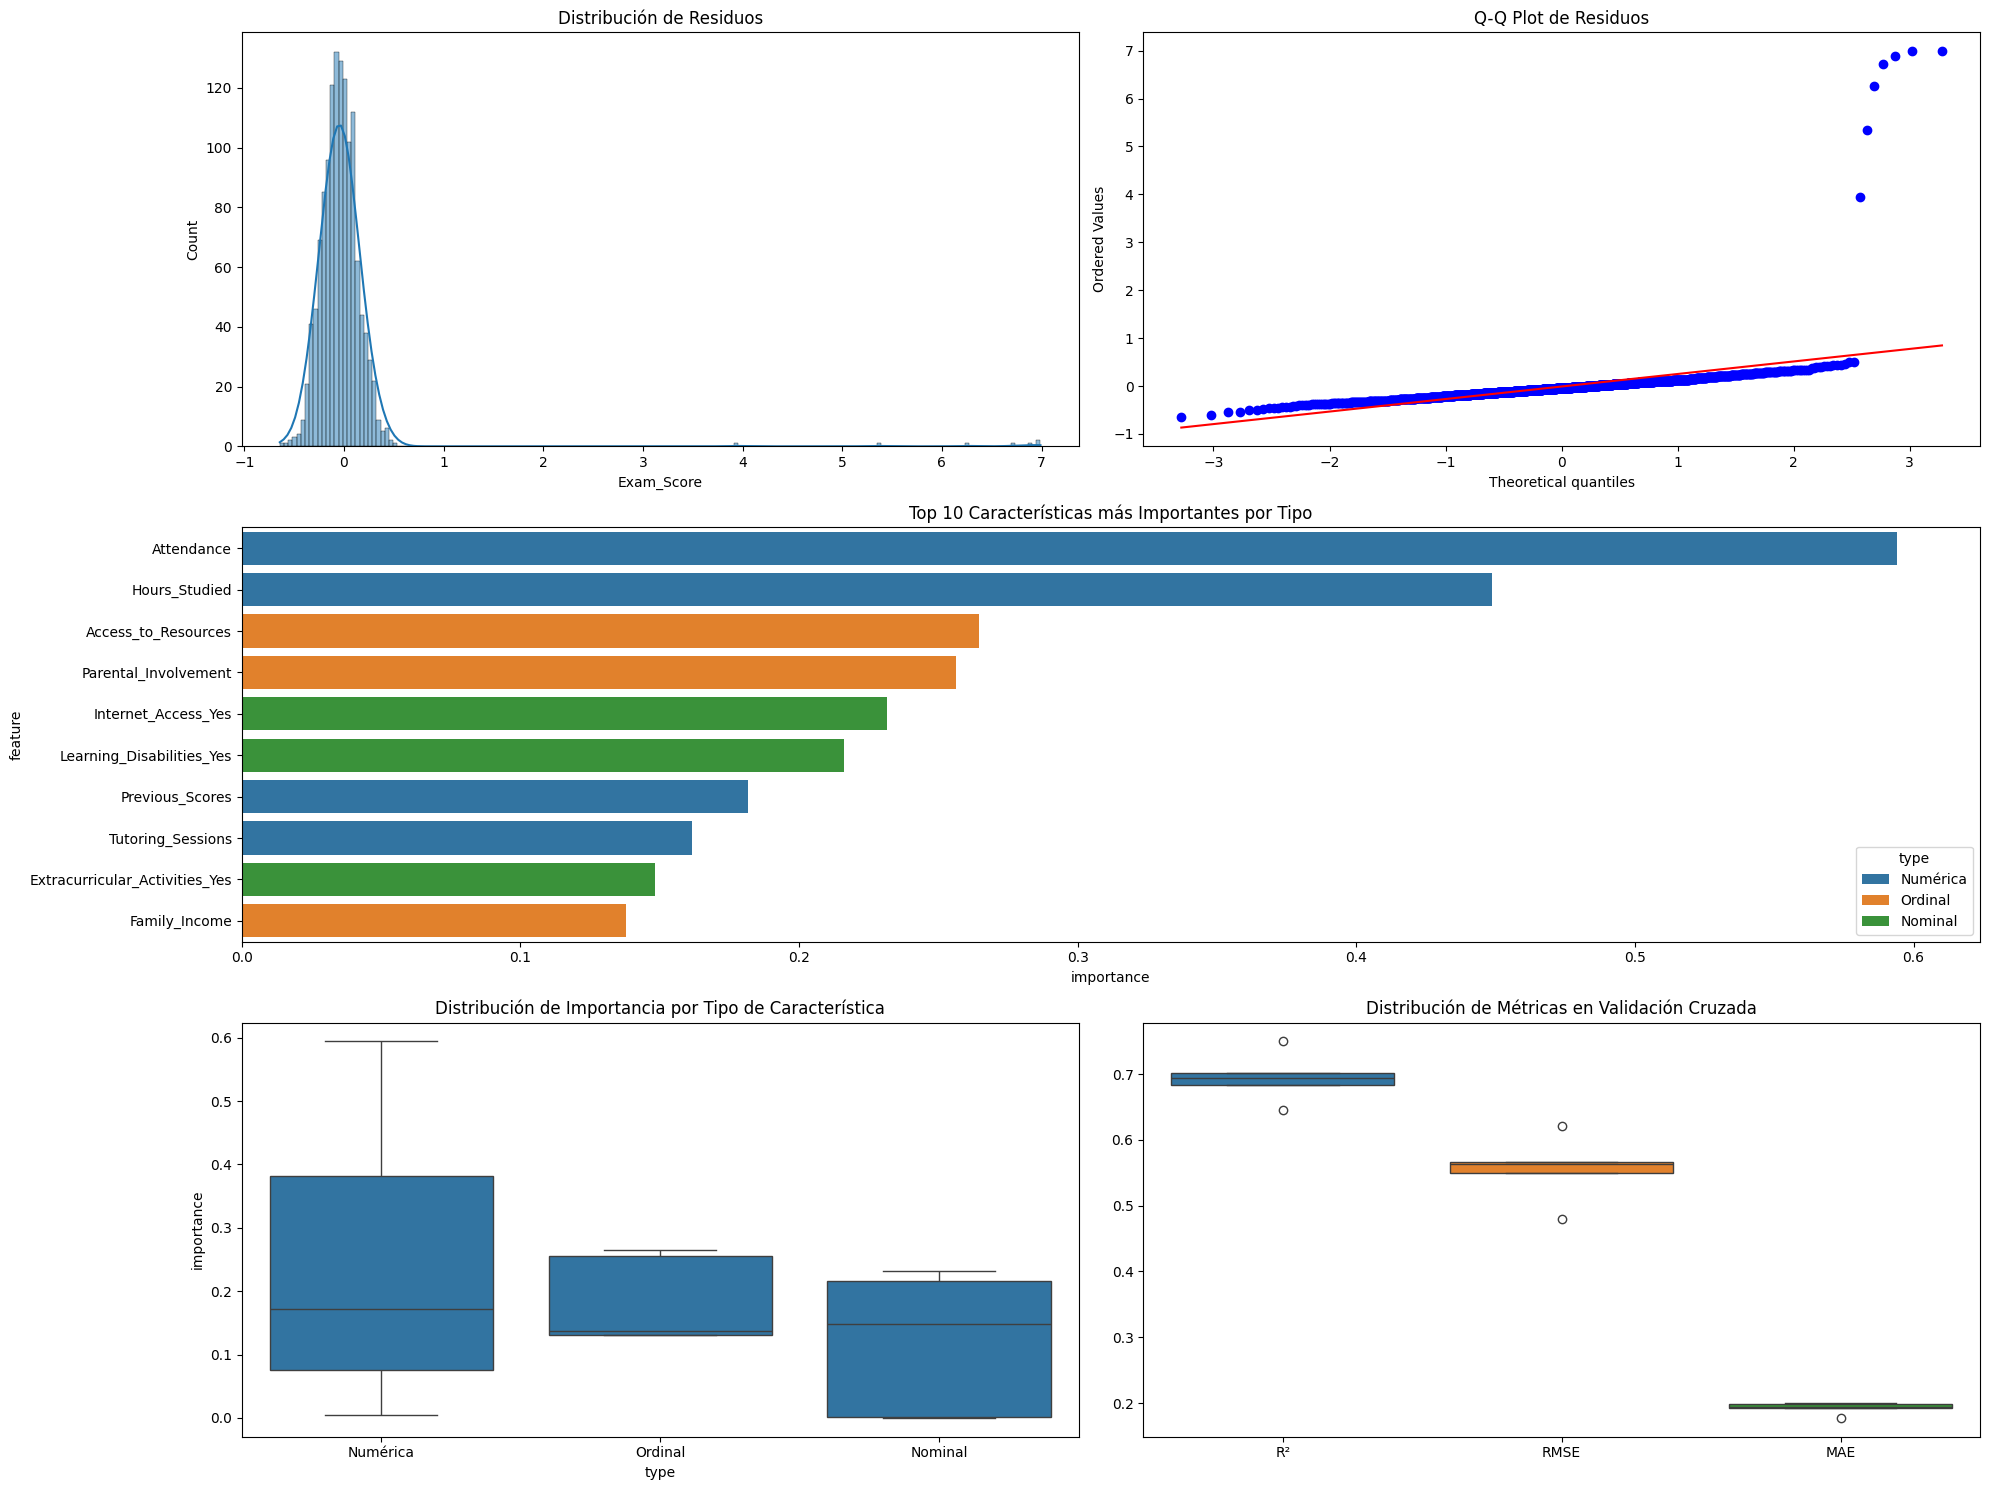

In [ ]:
analyzer.plot_diagnostics()